# Menggunakan Library Tensorflow

In [2]:
import tensorflow as tf ##jika error,  install tensorflow terlebih dahulu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
logging.getLogger('matplotlib.font_manager').disabled = True
import random

seed_value = 38
tf.random.set_seed(seed_value) 
np.random.seed(seed_value)      
random.seed(seed_value)  

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist  
                                                 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

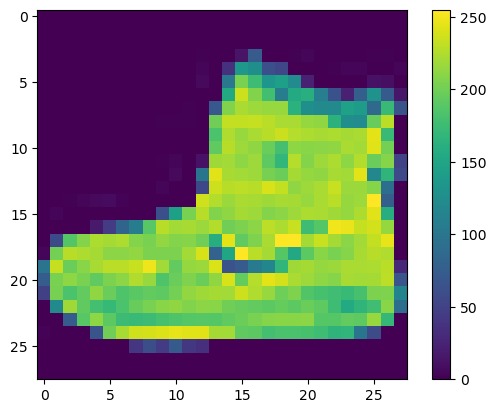

In [9]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)
plt.show() 

In [10]:
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255

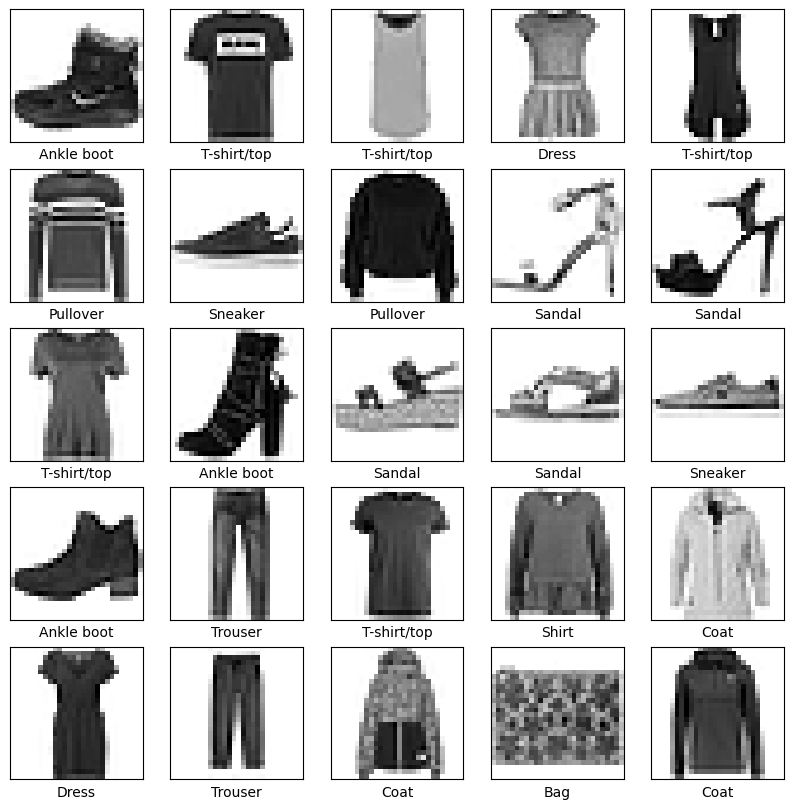

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10)
])

In [13]:
model_tf.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [14]:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True
)

history = model_tf.fit(
    train_images, train_labels,
    epochs=40,
    validation_data=(test_images, test_labels),
    callbacks=[early_stopping]
)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7265 - loss: 0.7457 - val_accuracy: 0.8379 - val_loss: 0.4335
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8362 - loss: 0.4535 - val_accuracy: 0.8494 - val_loss: 0.4017
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8477 - loss: 0.4167 - val_accuracy: 0.8474 - val_loss: 0.3983
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8574 - loss: 0.3942 - val_accuracy: 0.8548 - val_loss: 0.3878
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8600 - loss: 0.3788 - val_accuracy: 0.8634 - val_loss: 0.3670
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8673 - loss: 0.3640 - val_accuracy: 0.8678 - val_loss: 0.3635
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8693 - loss: 0.3538 - val_accuracy: 0.8653 - val_loss: 0.3634
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8718 - loss: 0.3533 - 

<function matplotlib.pyplot.show(close=None, block=None)>

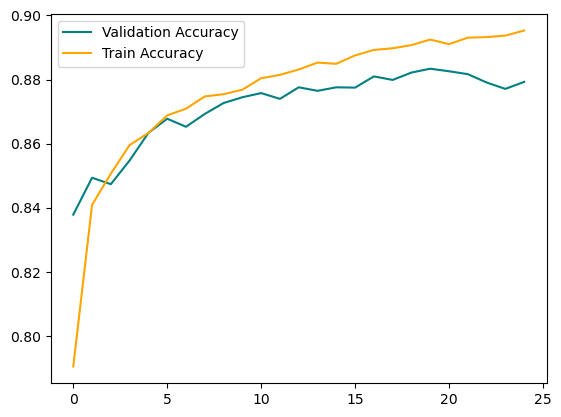

In [15]:
fig = plt.figure()
plt.plot(history.history['val_accuracy'], color='teal', label='Validation Accuracy')
plt.plot(history.history['accuracy'], color='orange', label='Train Accuracy')
plt.legend(loc="upper left")
plt.show

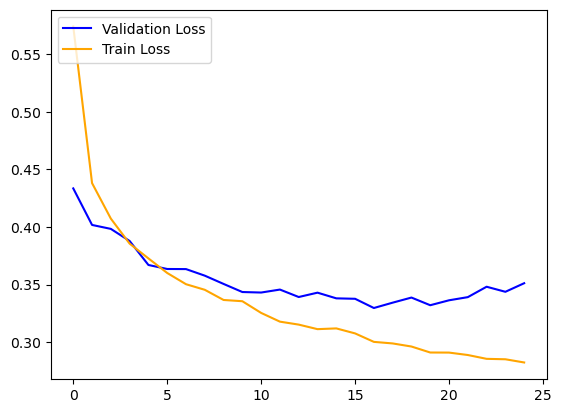

In [16]:
fig = plt.figure()
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.plot(history.history['loss'], color = 'orange', label = 'Train Loss')
plt.legend(loc="upper left")
plt.show()


In [17]:
test_loss, test_acc_tf = model_tf.evaluate(test_images, test_labels, verbose = 2) 
                                                                                
print('\nTest accuracy:', test_acc_tf) 

313/313 - 0s - 725us/step - accuracy: 0.8834 - loss: 0.3320

Test accuracy: 0.883400022983551


In [18]:
probability_model = tf.keras.Sequential([model_tf, 
                                        tf.keras.layers.Softmax()])

In [19]:
predictions_tf = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


In [20]:
predictions_tf[0]

array([2.9220490e-09, 1.9925390e-09, 1.1471355e-10, 1.0176383e-10,
       2.3395659e-11, 5.9845974e-03, 5.1617677e-10, 7.2639948e-04,
       4.6800291e-10, 9.9328893e-01], dtype=float32)

In [21]:
np.argmax(predictions_tf[0])

9

In [22]:
test_labels[0]

9

In [23]:
def plot_image(i, predictions_array, true_label, img): 
  true_label, img = true_label[i], img[i]                                        
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label): 
                                                       
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

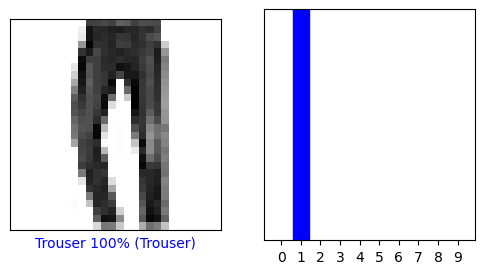

In [24]:
i = 5 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_tf[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions_tf[i], test_labels)
plt.show()

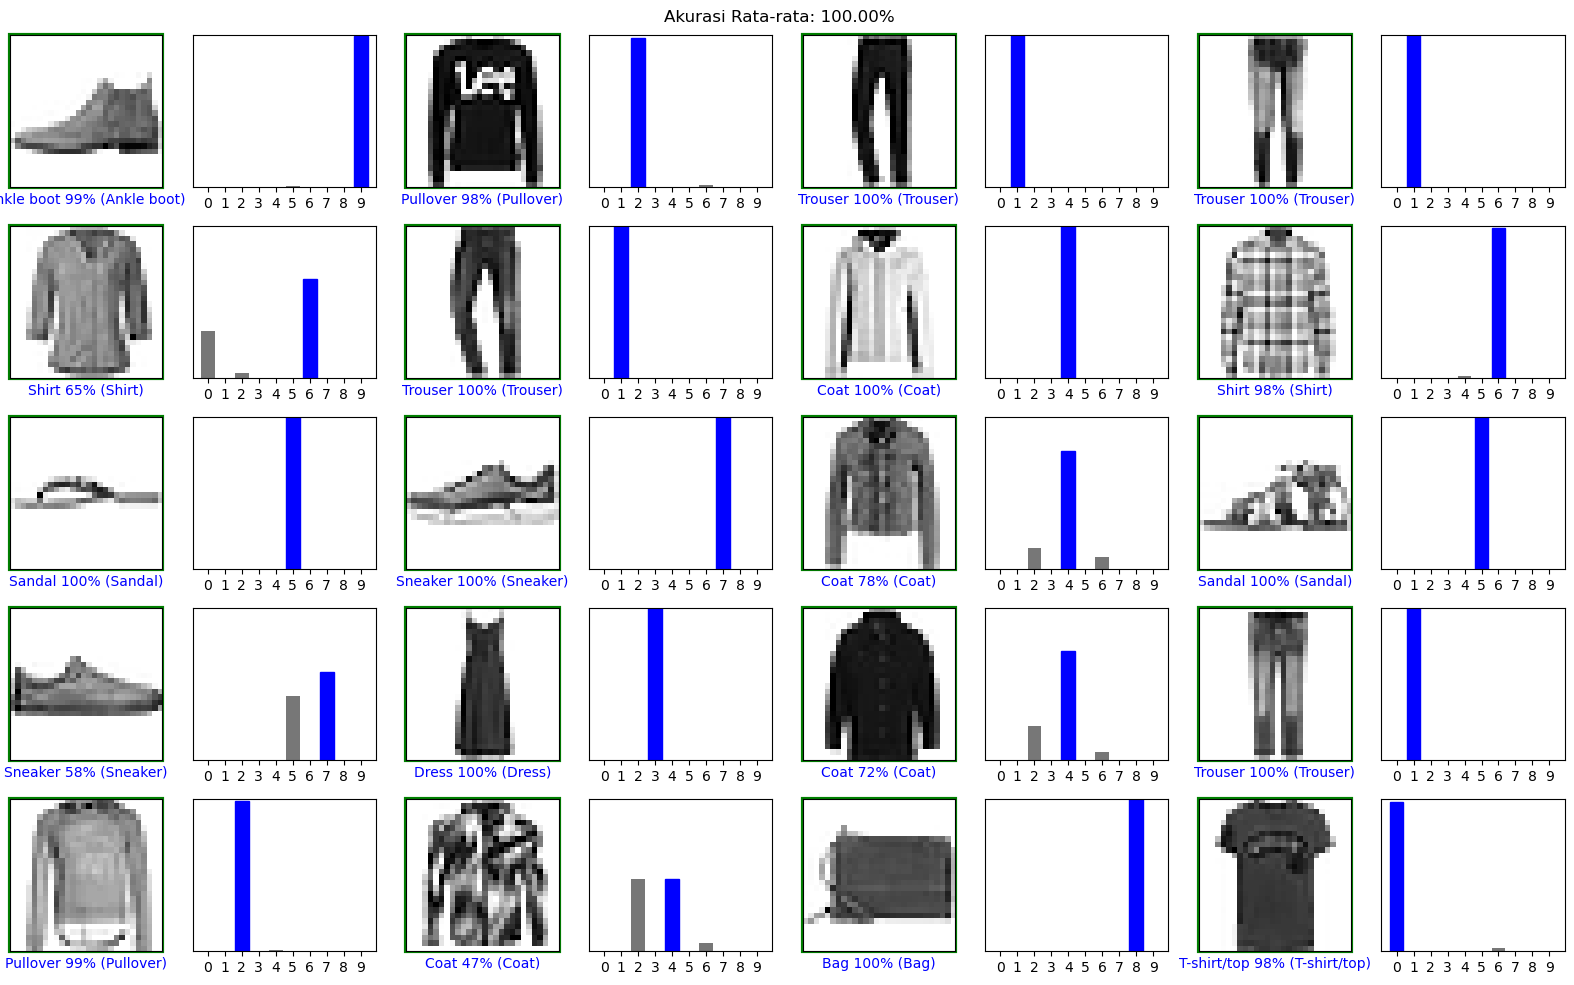

In [25]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_tf[i]) == test_labels[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100  

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_tf[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_tf[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

In [26]:
img = test_images[1] 

print(img.shape)

(28, 28, 1)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28, 1)


In [28]:
predictions_single = probability_model.predict(img) 
print(predictions_single) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[3.0867373e-05 1.5708821e-11 9.8263353e-01 4.3374317e-09 3.6639450e-03
  8.8891222e-14 1.3671689e-02 2.0659371e-15 1.1005728e-08 1.9479196e-14]]


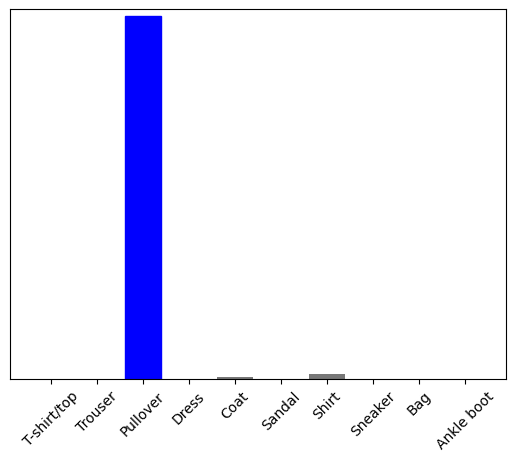

In [29]:
plot_value_array(1, predictions_single[0], test_labels) 
_ = plt.xticks(range(10), class_names, rotation=45) 
plt.show()

In [30]:
np.argmax(predictions_single[0]) 

2

In [31]:
df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_tf, axis=1),  
    'Proba_0': predictions_tf[:, 0],  
    'Proba_1': predictions_tf[:, 1]  
})

pixels = test_images.reshape(len(test_images), -1)

df_pixels = pd.DataFrame(pixels, columns=[f'pixel{i+1}' for i in range(28*28)])

df_test = pd.concat([df_test, df_pixels], axis=1)

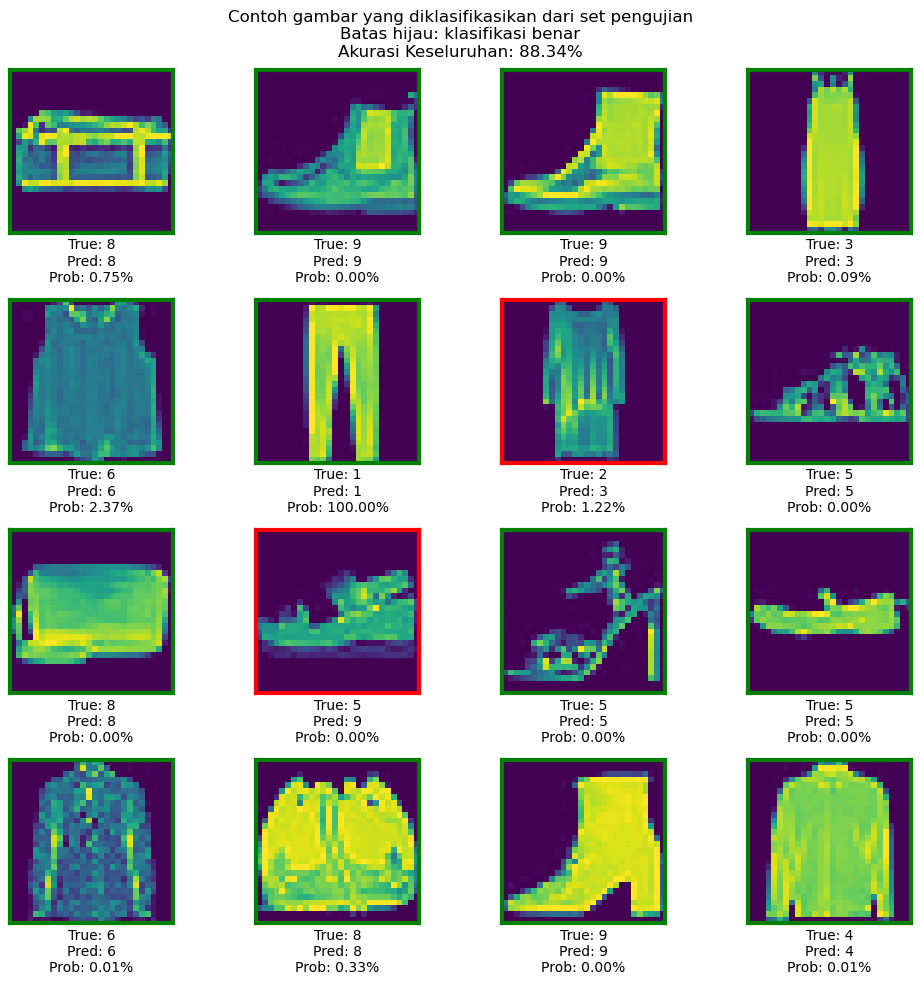

In [32]:
df_plot = df_test.sample(16, random_state=38).copy()
fig, ax = plt.subplots(4, 4, figsize=(10, 10))

rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]

    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100

    true_class = df_plot['Target'].values[i]

    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')

    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")

    edge_color = 'green' if predicted_class == true_class else 'red'
    axi.spines[:].set_edgecolor(edge_color)
    axi.spines[:].set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')

fig.tight_layout()
plt.show()

# Menggunakan Library Scikit-Learn

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf

In [34]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [35]:
from sklearn.datasets import fetch_openml
fashion_mnist = fetch_openml('Fashion-MNIST',version=1)

train_images = fashion_mnist.data[:60000] 
train_labels = fashion_mnist.target[:60000].astype(int)  
test_images = fashion_mnist.data[60000:] 
test_labels = fashion_mnist.target[60000:].astype(int) 

In [36]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import train_test_split
import numpy as np

train_images_split, val_images, train_labels_split, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=38
)

model_sklearn = MLPClassifier(hidden_layer_sizes=(128,300),
                      activation='relu',
                      alpha=0.0001,
                      learning_rate_init=0.0001,
                      early_stopping=True,
                      validation_fraction=0.2,
                      n_iter_no_change=10,
                      random_state=38,
                      verbose=True)

model_sklearn.fit(train_images_split, train_labels_split)
training_loss = model_sklearn.loss_curve_

Iteration 1, loss = 1.17060833
Validation score: 0.769792
Iteration 2, loss = 0.61593844
Validation score: 0.815104
Iteration 3, loss = 0.52194124
Validation score: 0.829896
Iteration 4, loss = 0.47986120
Validation score: 0.840729
Iteration 5, loss = 0.45285808
Validation score: 0.842500
Iteration 6, loss = 0.43457138
Validation score: 0.849896
Iteration 7, loss = 0.41732896
Validation score: 0.851979
Iteration 8, loss = 0.40399392
Validation score: 0.854896
Iteration 9, loss = 0.39444623
Validation score: 0.858333
Iteration 10, loss = 0.38925150
Validation score: 0.858437
Iteration 11, loss = 0.37735220
Validation score: 0.859792
Iteration 12, loss = 0.37093928
Validation score: 0.867292
Iteration 13, loss = 0.36348655
Validation score: 0.865521
Iteration 14, loss = 0.35662270
Validation score: 0.870000
Iteration 15, loss = 0.35207309
Validation score: 0.871042
Iteration 16, loss = 0.34716302
Validation score: 0.871979
Iteration 17, loss = 0.34114752
Validation score: 0.873854
Iterat

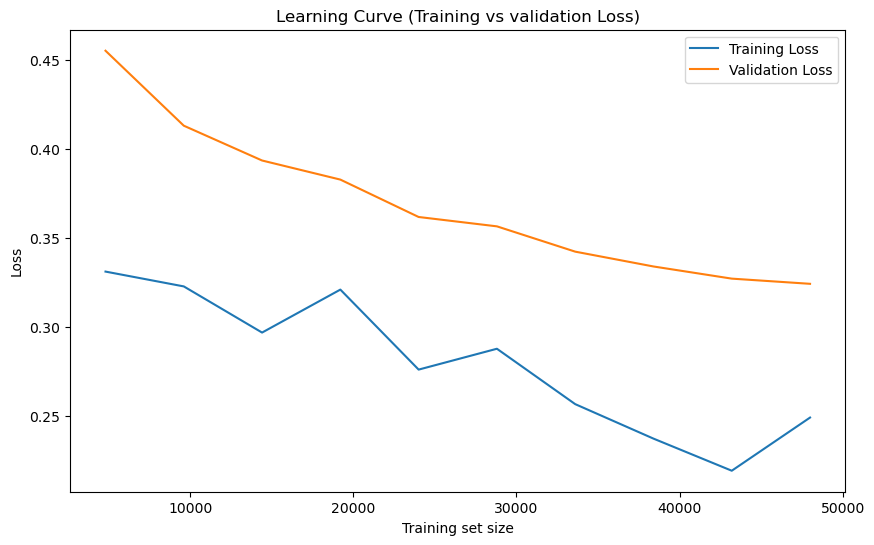

In [38]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model_sklearn, train_images, train_labels, train_sizes=np.linspace(0.1, 1.0, 10), cv=5,
    scoring='neg_log_loss', random_state=38, n_jobs=-1)

train_loss_mean = -train_scores.mean(axis=1)
val_loss_mean = -val_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_loss_mean, label='Training Loss')
plt.plot(train_sizes, val_loss_mean, label='Validation Loss')
plt.xlabel('Training set size')
plt.ylabel('Loss')
plt.title('Learning Curve (Training vs validation Loss)')
plt.legend()
plt.show()


In [39]:
test_predictions = model_sklearn.predict(test_images)
test_acc_sklearn = accuracy_score(test_labels, test_predictions)
print('\Test Accuracy:', test_acc_sklearn)

\Test Accuracy: 0.8788


In [40]:
print("\nClassification Report:\n", classification_report(test_labels, test_predictions))

predictions_proba = model_sklearn.predict_proba(test_images)


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.78      0.79      0.79      1000
           3       0.87      0.89      0.88      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.72      0.67      0.69      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [41]:
predictions_sklearn = model_sklearn.predict_proba(test_images)
print(predictions_sklearn[0])  
print("Predicted label for first image", np.argmax(predictions_sklearn[0]))

print("Actual label for first image", test_labels.iloc[0])

[1.94091296e-06 1.63892897e-07 1.03976118e-06 1.65016458e-06
 5.40998428e-07 1.06172218e-02 5.89058404e-06 2.61155707e-02
 1.19399940e-04 9.63136581e-01]
Predicted label for first image 9
Actual label for first image 9


In [42]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28) 
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'black' if predicted_label == true_label else 'white'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i] 
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks(range(10))
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


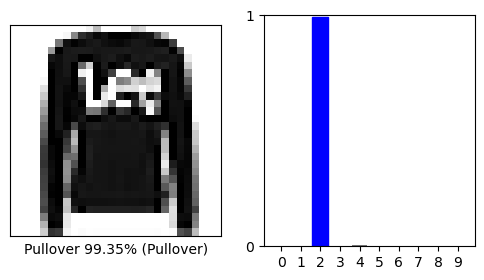

In [43]:
i = 1
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)
plt.show()

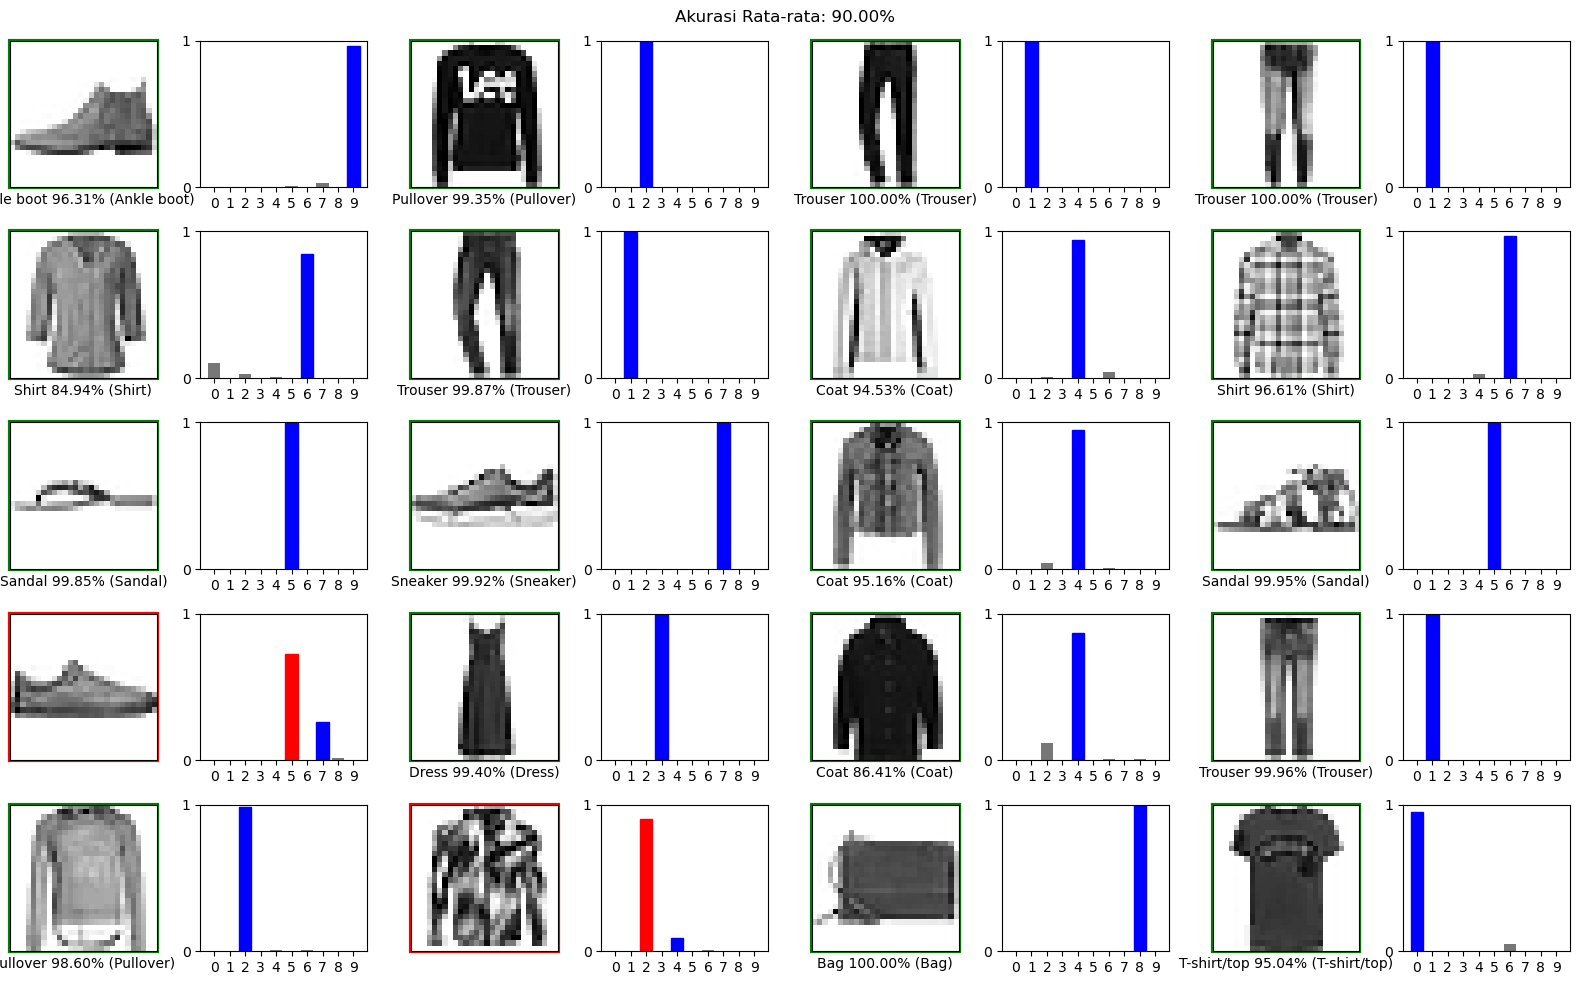

In [44]:
import numpy as np
import matplotlib.pyplot as plt

num_rows = 5
num_cols = 4
num_images = num_rows * num_cols

correct_predictions = [np.argmax(predictions_sklearn[i]) == test_labels.iloc[i] for i in range(num_images)]
average_accuracy = np.mean(correct_predictions) * 100

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions_sklearn[i], test_labels, test_images)
    border_color = 'green' if correct_predictions[i] else 'red'
    plt.gca().patch.set_edgecolor(border_color)
    plt.gca().patch.set_linewidth(3)

    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions_sklearn[i], test_labels)

plt.suptitle(f'Akurasi Rata-rata: {average_accuracy:.2f}%')
plt.tight_layout()
plt.show()

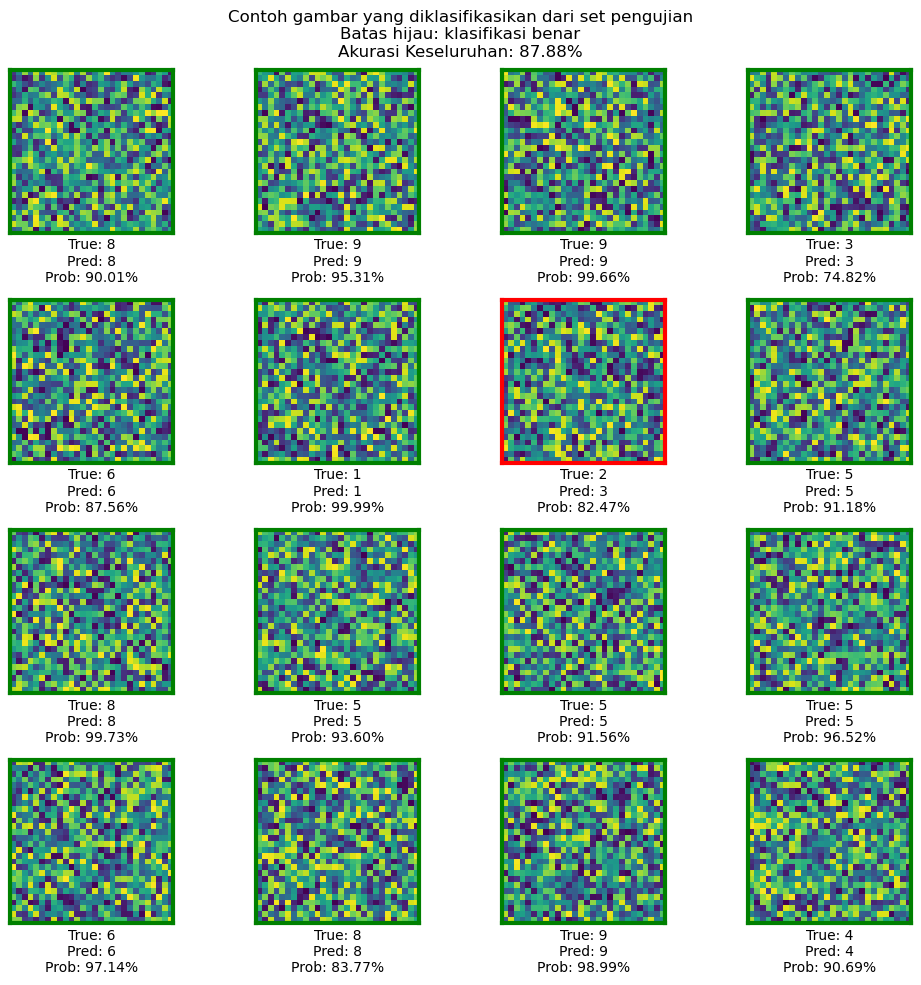

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_samples = 10000

df_test = pd.DataFrame({
    'Target': test_labels,  
    'Predicted': np.argmax(predictions_sklearn, axis=1),
    'Proba_0' : predictions_sklearn[:,0],
    'Proba_1' : predictions_sklearn[:,1],
})

df_test['Proba_0'] = df_test['Proba_0'] / (df_test['Proba_0'] + df_test['Proba_1'])
df_test['Proba_1'] = 1 - df_test['Proba_0']

for i in range(1, 28*28 + 1):
    df_test[f'pixel{i}'] = np.random.randint(0, 256, n_samples)

df_plot = df_test.sample(16, random_state=38).copy()

fig, ax = plt.subplots(4, 4, figsize=(10, 10))
rata2_accuracy = (df_test['Target'] == df_test['Predicted']).mean() * 100

for i, axi in enumerate(ax.flat):
    p0 = df_plot['Proba_0'].values[i]
    p1 = df_plot['Proba_1'].values[i]
    predicted_class = df_plot['Predicted'].values[i]
    prediction_probability = max(p0, p1) * 100
    true_class = df_plot['Target'].values[i]
    pixels = df_plot[[f'pixel{j}' for j in range(1, 28*28 + 1)]].values[i].reshape(28, 28)
    axi.imshow(pixels, cmap='viridis')
    axi.set(xticks=[], yticks=[],
            xlabel=f"True: {true_class}\nPred: {predicted_class}\nProb: {prediction_probability:.2f}%")
    edge_color = 'green' if predicted_class == true_class else 'red'
    for spine in axi.spines.values():
        spine.set_edgecolor(edge_color)
        spine.set_linewidth(3)

fig.suptitle(f'Contoh gambar yang diklasifikasikan dari set pengujian\n'
             f'Batas hijau: klasifikasi benar\nAkurasi Keseluruhan: {rata2_accuracy:.2f}%')
fig.tight_layout()
plt.show()

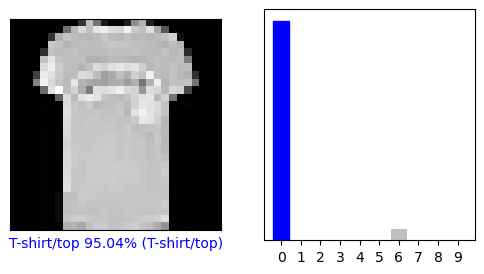

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    
    true_label, img = true_label.iloc[i], img.iloc[i].values.reshape(28, 28)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray') 
    
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'

    plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):.2f}% ({class_names[true_label]})", color=color)

    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label.iloc[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#77777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

i = 19
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plot_image(i, predictions_sklearn[i], test_labels, test_images)

plt.subplot(1, 2, 2)
plot_value_array(i, predictions_sklearn[i], test_labels)

plt.show()

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def save_image_only(i, true_label, img):
    img = img.iloc[i].values.reshape(28, 28)

    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.savefig(f"image_only_{i}.jpeg", bbox_inches='tight', pad_inches=0)
    plt.close()

i = 19
save_image_only(i, test_labels, test_images)

In [54]:
import pandas as pd

data = {
    'Model' : ['TensorFlow', 'Scikir-Learn'],
    'Accuracy' : [test_acc_tf, test_acc_sklearn],
    'Architecture' : ['Neural Network (2 hidden layers)', 'MLP (2 hidden layer)'],
    'Early Stopping' : ['Yes', 'Yes'],
}

comparison_df = pd.DataFrame(data)

best_model = comparison_df.loc[comparison_df['Accuracy'].idxmax()]

print("Comparison of Model Performance:")
print(comparison_df)

print("\nBest Model based on Accuracy:")
print(best_model)


Comparison of Model Performance:
          Model  Accuracy                      Architecture Early Stopping
0    TensorFlow    0.8834  Neural Network (2 hidden layers)            Yes
1  Scikir-Learn    0.8788              MLP (2 hidden layer)            Yes

Best Model based on Accuracy:
Model                                   TensorFlow
Accuracy                                    0.8834
Architecture      Neural Network (2 hidden layers)
Early Stopping                                 Yes
Name: 0, dtype: object


In [55]:
#Cara dump pickle jika model sklearn yang terbaik
import pickle
# Misalnya `model_sklearn` adalah model terbaik Anda dari Scikit-Learn
with open('best_model.pkl', 'wb') as file:
    pickle.dump(model_sklearn, file)


In [56]:
#Cara dump h5 jika model tensorflow yang terbaik
import pickle
import tensorflow as tf
# Menyimpan model TensorFlow
model_tf.save('best_model_tf.h5')
